## Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
data = pd.read_csv('./datasets/data.csv')
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [3]:
data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


Столбцы в таблице имеют следующие значения:
* children — количество детей в семье
* days_employed — общий трудовой стаж в днях
* dob_years — возраст клиента в годах
* education — уровень образования клиента
* education_id — идентификатор уровня образования
* family_status — семейное положение
* family_status_id — идентификатор семейного положения
* gender — пол клиента
* income_type — тип занятости
* debt — имел ли задолженность по возврату кредитов
* total_income — ежемесячный доход
* purpose — цель получения кредита



### Вывод

Краткий обзор представленной информации говорит о наличии некоторых проблем с данными которые нужно решить до начала обработки:
1. Общий трудовой стаж клиентов принимает отрицательные значения, что является не нормальной ситуацией и возможно связано с некорректным вводом данных.
2. Записи уровня образования клиента в столбце education имеют разный регистр. Возможно это связано с возможностью ручного ввода данных об образовании клиента работником банка. Лучше дать работнику банка возможность выбирать из списка при вводе данных.
3. В столбцах days_employed и total_income имеются пропущенные значения и их необходимо каким-то образом заполнить. Одинаковое количество пропущеных значений в обоих столбцах говорит о том что отсутствие данных в обоих столбцах может быть вызвано одними и теми же причинами.
4. Данные в столбцах education, education_id, family_status, family_status_id, income_type являются категориальными необходимо изменить их тип.
5. Данный файл является относительно небольшим (2 МБ), однако в случае значительного увеличения данных в будущем для экономии экономии памяти лучше использовать тип uint8 вместо int64 для столбцов children и dob_years так как маловероятно что возраст клиента или количество детей у него будут более 255 (максимальное число детей в имеющихся данных 20). Так же данные в столбцах education и education_id (как и в столбцах family_status и family_status_id) являются дублирующими друг друга и никакой дополнительной информации не несут. По этому соответствие education столбцу education_id (family_status и family_status_id) лучше вынести в отдельные словари, а столбцы education и family_status из данных удалить.
6. В данных есть заемщики с числом детей равным минус единице, в данных есть люди с возрастом равным 0 лет. Прежде чем отвечать на поставленные Заказчиком вопросы с этими данными так же надо разобраться.

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Очень хорошее начало! Данные загружены и подробно изучены, отлично подмечены основные проблемы

</div>

### Шаг 2. Предобработка данных

### Обработка пропусков

In [4]:
#выведем строки с незаполненными данными об отсутствующем стаже 
data[data['days_employed'].isnull()].head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
65,0,NaN,21,среднее,1,Не женат / не замужем,4,M,компаньон,0,NaN,операции с коммерческой недвижимостью
67,0,NaN,52,высшее,0,женат / замужем,0,F,пенсионер,0,NaN,покупка жилья для семьи
72,1,NaN,32,высшее,0,женат / замужем,0,M,госслужащий,0,NaN,операции с коммерческой недвижимостью
82,2,NaN,50,высшее,0,женат / замужем,0,F,сотрудник,0,NaN,жилье
83,0,NaN,52,среднее,1,женат / замужем,0,M,сотрудник,0,NaN,жилье


In [5]:
#убедимся что для всех строк в которых не заполнены данные о стаже так же не заполнены данные о ежемесячном доходе 
data[data['days_employed'].isnull()]['total_income'].unique()

array([nan])

Поскольку чило незаполненных строк о стаже клиента и его ежемесячном доходе одинаковое и они всегда "ходят парой", то можно сделать вывод, что отсутствие указанных данных скорее всего вызвано одной и той же причиной и связано с отказом клиента от предоставления сведений о своей работе (доходах). Было бы так же интересно исследовать влияет ли предоставление клиентом информации о своей работе на возвратность кредита.

In [6]:
# создадим в данных столбец job_info в который запишем True, если информация о стаже и заработке есть и False в противном случае
data['job_info'] = data['days_employed'].notna()

# рассчитаем процент незаполненных строк
print('Количество незаполненных строк: {:.1%}'.format(1 - data['job_info'].sum() / data['job_info'].count()))

Количество незаполненных строк: 10.1%


Общее количество строк с пропущеными данными составляет порядка 10% от общего числа записей, просто выкинуть их не получится так как это может привести к значительному сокращению выборки. Таким образом необходимо разработать правило заполнения пропусков. В общем случае доходы людей могут зависеть от пола, возраста и образования. 
Чтобы определить необходимость учета указанных факторов при заполнении пропусков оценим зависимость медианного дохода от различных пареметров. Начнем с зависимости от пола клиента

#### Оценка зависимости доходов заемщика от пола

In [7]:
#создадим сводную таблицу в котороую выведем число клиентов, средний и медианный доход в зависимости от пола
data.groupby('gender')['total_income'].agg(['count','mean','median'])

,count,mean,median
gender,,,
F,12752,154097.529734,134155.283479
M,6598,193169.652274,167714.343716
XNA,1,203905.157261,203905.157261


Видно, что не смотря на то что женщины чаще становятся заемщиками их средний и медианный доход ниже чем у мужчин. Таким образом пол заемщика необходимо учитывать при определении среднего заработка, а как следствие возможности погашения кредита. Так же видно что таблица с данными содержит одну строчку с неуказанным значением пола заемщика, возможно работник банка забыл заполнить графу "пол клиента" при оформлении кредита. Так как такая строчка всего одна, то ее удаление не окажет значительного влияния на данные, но упростит дальнейшую работу.

In [8]:
# удалим требуемую строку методом drop и повторно выведем сводную таблицу
data = data.drop(data[data['gender'] == 'XNA'].index)
data.groupby('gender')['total_income'].agg(['count','mean','median'])

,count,mean,median
gender,,,
F,12752,154097.529734,134155.283479
M,6598,193169.652274,167714.343716


Теперь со столбцом пол заемщика все впорядке, можно двигаться дальше

#### Оценка зависимости доходов заемщика от образования

 Прежде чем перейти к построению сводной таблицы приведем все строковые переменные в столбце education к нижнему регистру

In [9]:
data['education'] = data['education'].str.lower()
data['education'].unique()

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

Теперь с образованием все в порядке и мы можем построить таблицу с доходами

In [10]:
total_income_by_education = data.groupby('education')['total_income'].agg(['count','mean','median'])
total_income_by_education

,count,mean,median
education,,,
высшее,4716,207142.515219,175340.818855
начальное,261,132155.513626,117137.352825
неоконченное высшее,674,181500.831180,160054.965348
среднее,13693,153715.643971,136478.643244
ученая степень,6,174750.155792,157259.898555


In [11]:
# введем в сводную таблицу дополнительный столбец median_normalized в котором отнормируем медианную зарплату 
# к заплате людей со средним образованием
total_income_by_education['median_normalized'] = (total_income_by_education['median'] / 
                                                  total_income_by_education.loc['среднее', 'median'])
total_income_by_education

,count,mean,median,median_normalized
education,,,,
высшее,4716,207142.515219,175340.818855,1.284749
начальное,261,132155.513626,117137.352825,0.858283
неоконченное высшее,674,181500.831180,160054.965348,1.172747
среднее,13693,153715.643971,136478.643244,1.000000
ученая степень,6,174750.155792,157259.898555,1.152267


Анализ приведенной выше таблицы показывает, что образование так же оказывает существенное влияние на уровень доходов и этот фактор необходимо учитывать. Так люди с высшим образованием зарабатывают примерно на 30% больше чем люди со средним образованием, а люди с начальным образованием на 14 % меньше чем люди со средним образованием. Интересно, что в данной выборке люди имеющие ученую степень в среднем зарабатывают меньше чем люди с высшим образованием. Скорее всего этот эффект вызван нерепрезентативной выборкой людей имеющих ученую степень (всего 6 человек на весь дата сет). Малое количество людей с ученой степенью скорее говорит о том, что такие люди имеют доходы не ниже людей с высшим образованием, а выше, и, как следствие, гораздо реже берут кредиты.

#### Оценка зависимости доходов заемщика от возраста
Для начала разобъем людей по возрасту на группы. Для того чтобы оценить возможность разбиения на группы посмотрим на гисторгамму распределения клиентов по возрастам

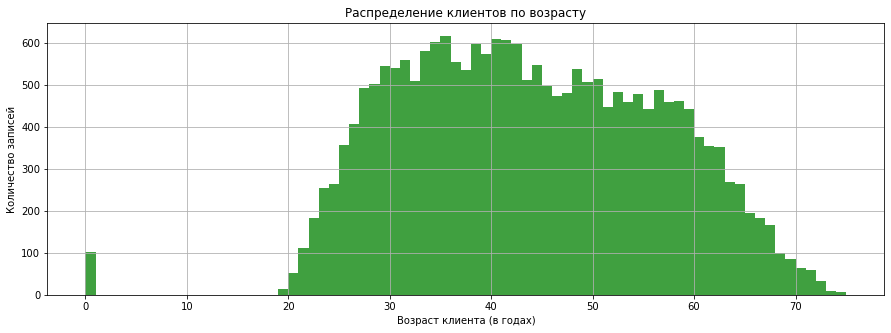

In [12]:
(data['dob_years'].hist(bins = 75, figsize = (15, 5), color = 'green', alpha = 0.75,  range=(0, 75))
                  .set(xlabel='Возраст клиента (в годах)',
                       ylabel='Количество записей',
                       title='Распределение клиентов по возрасту'));

Прежде чем идти дальше необходимо разобраться со строками в которых возраст людей равен нулю. Выведем эти строки

In [13]:
data[data['dob_years'] == 0].head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,job_info
99,0,346541.618895,0,среднее,1,женат / замужем,0,F,пенсионер,0,71291.522491,автомобиль,True
149,0,-2664.273168,0,среднее,1,в разводе,3,F,сотрудник,0,70176.435951,операции с жильем,True
270,3,-1872.663186,0,среднее,1,женат / замужем,0,F,сотрудник,0,102166.458894,ремонт жилью,True
578,0,397856.565013,0,среднее,1,женат / замужем,0,F,пенсионер,0,97620.687042,строительство собственной недвижимости,True
1040,0,-1158.029561,0,высшее,0,в разводе,3,F,компаньон,0,303994.134987,свой автомобиль,True
1149,0,-934.654854,0,среднее,1,женат / замужем,0,F,компаньон,0,201852.430096,покупка недвижимости,True
1175,0,370879.508002,0,среднее,1,женат / замужем,0,F,пенсионер,0,313949.845188,получение дополнительного образования,True
1386,0,-5043.219890,0,высшее,0,женат / замужем,0,M,госслужащий,0,240523.618071,сделка с автомобилем,True
1890,0,NaN,0,высшее,0,Не женат / не замужем,4,F,сотрудник,0,NaN,жилье,False
1898,0,370144.537021,0,среднее,1,вдовец / вдова,2,F,пенсионер,0,127400.268338,на покупку автомобиля,True


In [14]:
#определим процент людей для которых возраст указан равным нулю
print('Количество строк с нулевым возрастом: {:.1%}'.format(data[data['dob_years'] == 0].shape[0] / data.shape[0]))

Количество строк с нулевым возрастом: 0.5%


Так как количество строк с нулевым возрастом не велико, то можно либо исключить их из рассмотрения либо заполнить нулевые значения средним возрастом это не окажет существенного влияния на распределения. Определим средний возраст заемщиков мужчин и заемщиков женщин и заменим нулевые значения на средний возраст

In [15]:
#Определяем средний возраст заемщиков женщин и округляем его до целого
female_mean_age = round(data[data['gender'] == 'F']['dob_years'].mean())
female_mean_age

44

In [16]:
#Аналогично определяем средний возраст заемщиков мужчин и округляем его до целого
male_mean_age = round(data[data['gender'] == 'M']['dob_years'].mean())
male_mean_age

41

Интересно что средний возраст заемщиков-мужчин хоть и не сильно, но ниже среднего возраста заемщиков женщин

In [17]:
# Заменим в таблице нулевой возраст на средний в зависимости от пола используя метод mask
data['dob_years'].mask((data['dob_years'] == 0) & (data['gender'] == 'F'), other=female_mean_age, inplace=True)
data['dob_years'].mask((data['dob_years'] == 0) & (data['gender'] == 'M'), other=male_mean_age, inplace=True)

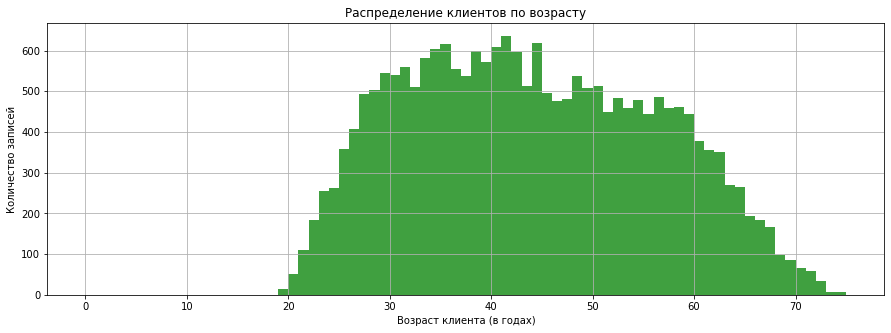

In [18]:
# убедимся что людей с нулевым возрастом в данных больше нет. посмотрим гистограмму еще раз
(data['dob_years'].hist(bins = 75, figsize = (15, 5), color = 'green', alpha = 0.75, range=(0, 75))
                  .set(xlabel='Возраст клиента (в годах)',
                       ylabel='Количество записей',
                       title='Распределение клиентов по возрасту'));

In [19]:
# посмотрим на параметры распределения клиентов по возрасту после замены нулевых значений
data['dob_years'].describe()

count    21524.000000
mean        43.496701
std         12.218106
min         19.000000
25%         34.000000
50%         43.000000
75%         53.000000
max         75.000000
Name: dob_years, dtype: float64

Теперь можно классифицировать заемщиков по возрастным группам. Из распределения видно, что диапазон возрастов заемщиков находится в диапазоне от 19 до 75 лет с матожиданием 43,5 года и СКО порядка 12 лет. Разделим заемщиков на следующие возрастные группы по 12 лет в каждой:
* менее 30 лет (реально от 18 до 30)
* от 31 до 42 лет включительно
* от 43 до 54 лет включительно
* от 55 до 66 лет включительно
* более 67 лет

In [20]:
#напишем функцию которая в таблице создаст столбец age_group в котором будет записана возрастная группа заемщика

def group_by_age(data):
    bins = [0, 30, 42, 54, 66, 255]
    labels = ['18-30','31-42','43-54', '55-66', '>67']
    data['age_group'] = pd.cut(data['dob_years'], bins=bins, labels=labels)
    return data

group_by_age(data).head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,job_info,age_group
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,True,31-42
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,True,31-42
2,0,-5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,True,31-42
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,True,31-42
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,True,43-54


In [21]:
# строим сводную таблицу
total_income_by_age = data.groupby('age_group')['total_income'].agg(['count','mean','median'])
total_income_by_age

,count,mean,median
age_group,,,
18-30,3365,161347.824406,143471.712277
31-42,6277,178063.830007,155334.121780
43-54,5406,172605.158286,148794.984351
55-66,3821,152727.480811,132306.594835
>67,481,129454.854292,112656.049064


In [22]:
# введем в сводную таблицу дополнительный столбец в котором отнормируем медианную зарплату 
# к заплате людей с возрастом от 31 до 42 лет
total_income_by_age['median_normalized'] = total_income_by_age['median'] / total_income_by_age.loc['31-42', 'median']
total_income_by_age

,count,mean,median,median_normalized
age_group,,,,
18-30,3365,161347.824406,143471.712277,0.923633
31-42,6277,178063.830007,155334.121780,1.000000
43-54,5406,172605.158286,148794.984351,0.957903
55-66,3821,152727.480811,132306.594835,0.851755
>67,481,129454.854292,112656.049064,0.725250


Медианная зарплата людей достигает максимума в возрасте от 31 до 42 лет и далее с возрастом постепенно уменьшается. Значительное уменьшение доходов заемщиков после 55 лет скорее всего связано с постепенным выходом людей на пенсию. Для того чтобы проверить это оценим как меняются доходы заемщиков в зависимости от типа занятости

#### Оценка зависимости доходов заемщика от типа занятости
Построим сводную таблицу зависимости доходов заемщика от типа занятости

In [23]:
total_income_by_income_type = data.groupby('income_type')['total_income'].agg(['count','mean','median'])
total_income_by_income_type

,count,mean,median
income_type,,,
безработный,2,131339.751676,131339.751676
в декрете,1,53829.130729,53829.130729
госслужащий,1312,170898.309923,150447.935283
компаньон,4576,202417.136353,172319.266339
пенсионер,3443,137127.465690,118514.486412
предприниматель,1,499163.144947,499163.144947
сотрудник,10014,161380.260488,142594.396847
студент,1,98201.625314,98201.625314


In [24]:
# введем в сводную таблицу дополнительный столбец в котором отнормируем медианную зарплату 
# к заплате людей с типом занятости "сотрудник"
total_income_by_income_type['median_normalized'] = (total_income_by_income_type['median'] / 
                                                    total_income_by_income_type.loc['сотрудник', 'median'])
total_income_by_income_type

,count,mean,median,median_normalized
income_type,,,,
безработный,2,131339.751676,131339.751676,0.921072
в декрете,1,53829.130729,53829.130729,0.377498
госслужащий,1312,170898.309923,150447.935283,1.055076
компаньон,4576,202417.136353,172319.266339,1.208457
пенсионер,3443,137127.465690,118514.486412,0.831130
предприниматель,1,499163.144947,499163.144947,3.500580
сотрудник,10014,161380.260488,142594.396847,1.000000
студент,1,98201.625314,98201.625314,0.688678


Действительно медианные доходы пенсионеров оказались примерно на 17% процентов ниже чем доходы людей из категории "сотрудник". Следует отметить сильную неравномерность выборки по группам. Так категории "студент", "предпрениматель", "в декрете" представлены только одним человеком, а категория "безработный" только двумя людьми. Интересно, что медианные доходы безработных всего на 8% ниже чем доходы работающих. Сильная неравномерность выборки не позволяет использовать параметр "тип занятости" для построения распределения по этому параметру

#### Построение сводной таблицы по медианным доходам и заполнение пропусков по доходам заемщиков в данных

Теперь можно построить сводную таблицу медианного ежемесячного дохода заемщиков в зависимости от пола, возраста и уровня образования.

In [25]:
data_pivot = data.pivot_table(index = ['gender', 'education'], columns = 'age_group', 
                              values = 'total_income', aggfunc = 'median')

# выведем сводную таблицу округлив рассчитанные значения для наглядности
data_pivot.round()

age_group                      18-30     31-42     43-54     55-66       >67
gender education                                                            
F      высшее               149010.0  164507.0  177479.0  158506.0  133173.0
       начальное            116527.0  115974.0  130774.0  105766.0   77685.0
       неоконченное высшее  129020.0  158948.0  177283.0  158814.0  133695.0
       среднее              115502.0  130215.0  129741.0  122123.0  104276.0
       ученая степень            NaN  111392.0       NaN  255425.0       NaN
M      высшее               193335.0  211985.0  220598.0  185752.0  158408.0
       начальное            169494.0  137266.0  127878.0  114069.0  131373.0
       неоконченное высшее  167306.0  223871.0  183775.0  229339.0  124667.0
       среднее              153537.0  166316.0  161698.0  143277.0  121001.0
       ученая степень            NaN  115949.0  198571.0  268411.0   98752.0

Поскольку данные по типу образования "ученая степень" не репрезентативны (малая выборка) в сводной таблице так же появились пропущенные значения. Тем не менее это не страшно, просто не будем использовать данные по нерепрезентативной выборке при заполненни пропусков. 
Прежде чем провести заполнение пропусков посмотрим распределение доходов заемщиков до замены, затем проведем замену и повторно посмотрим распределение

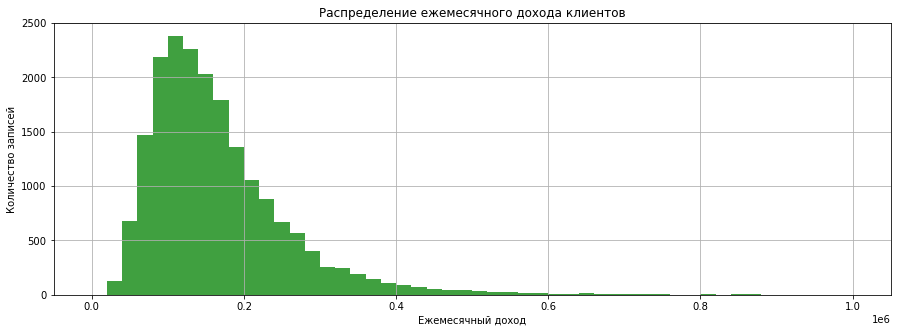

In [26]:
# построим гистограмму по столбцу total_income до замены пропущенных данных
(data['total_income'].hist(bins=50, figsize=(15, 5), color='green', alpha=0.75, range=(0, 1000000))
                     .set(xlabel='Ежемесячный доход',
                          ylabel='Количество записей',
                          title='Распределение ежемесячного дохода клиентов'));

In [27]:
# переберем все возможные комбинации полей gender, education, age_group и заменяем NaN в столбце total_income по маске
# исключаем из перебора тип образования 'ученая степень' так как выборка по нему не репрезентативна
for gender in data['gender'].unique():
    for education in data['education'].unique():
        if education != 'ученая степень':
            for age_group in data['age_group'].unique():
                try:
                    mask = ((data['total_income'].isnull()) & (data['gender'] == gender) & 
                            (data['education'] == education) & (data['age_group'] == age_group))
                    data['total_income'].mask(mask, other=data_pivot.loc[(gender, education), age_group], inplace=True)
                except:
                    print('Ошибка замены данных в столбце total_income')

In [28]:
# проверим что в столбце total_income не осталось нулевых элементов
data['total_income'].isnull().sum()

0

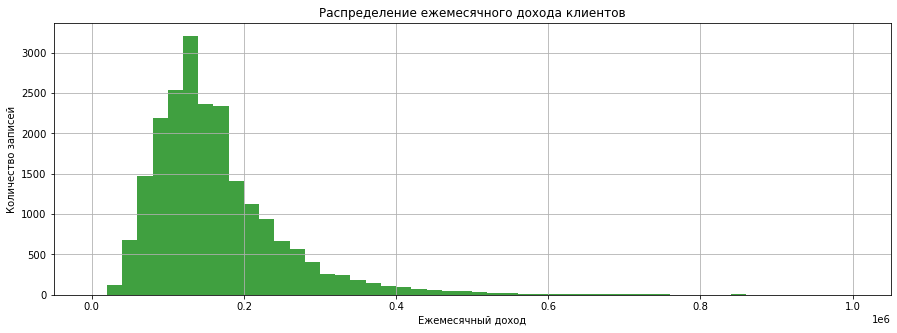

In [29]:
# построим гистограмму по столбцу total_income после замены пропущенных данных
(data['total_income'].hist(bins=50, figsize=(15, 5), color='green', alpha=0.75, range=(0, 1000000))
                     .set(xlabel='Ежемесячный доход',
                          ylabel='Количество записей',
                          title='Распределение ежемесячного дохода клиентов'));

Видно что после вставки незаполненых элементов гистограмма распределения доходов немного исказилась, появился более выраженный пик в центре тяжести распределения. Если это будет мешать последующей обработке данных или для последующей обработки важно точное следование исходному распределению то можно заполнять недостающие данные не детерминированными медианами, а случайными числами сгенерированными с требуемыми параметрами распределения. В текущем рассмотрении данные можно считать адекватно распределенными, релеевское распределение в общем сохранено. 

#### Заполнение пропусков по трудовому стажу заемщиков
Посмотрим гисторамму распределения значений трудового стажа заемщиков

count     19350.000000
mean      63049.877770
std      140830.166081
min      -18388.949901
25%       -2747.486276
50%       -1203.307346
75%        -291.077541
max      401755.400475
Name: days_employed, dtype: float64

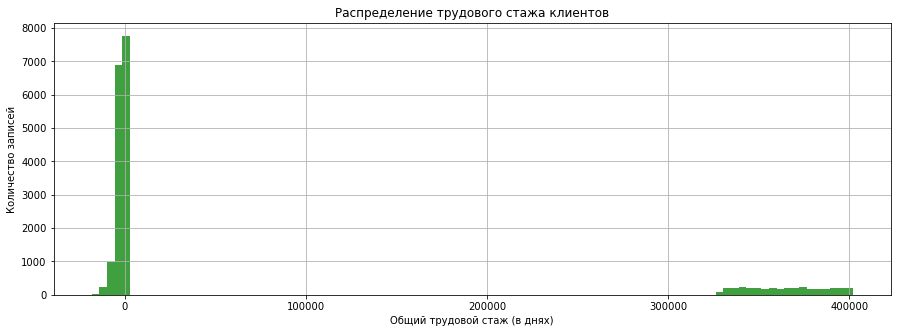

In [30]:
(data['days_employed'].hist(bins=100, figsize=(15, 5), color='green', alpha=0.75)
                      .set(xlabel='Общий трудовой стаж (в днях)',
                           ylabel='Количество записей',
                           title='Распределение трудового стажа клиентов'));
data['days_employed'].describe()

Видно, что распределение состоит из двух: мод одна экспоненциальная, другая равномерно распределенная. Рассмотрим графики двух мод подробнее

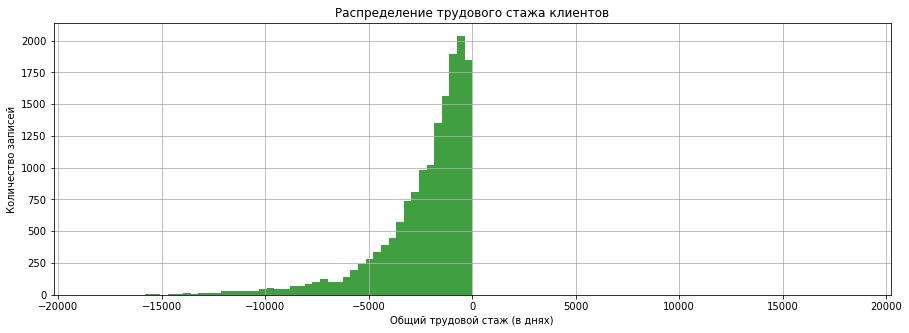

In [31]:
(data['days_employed'].hist(bins=100, figsize=(15, 5), color='green', alpha=0.75, 
                            range=(data['days_employed'].min(), data['days_employed'].min() * (-1)))
                      .set(xlabel='Общий трудовой стаж (в днях)',
                           ylabel='Количество записей',
                           title='Распределение трудового стажа клиентов'));

В экспоненциальной моде стаж имеет отрицательное значение. Возможно это вызвано тем что работник банка перепутал графы даты начала работы и дата окончания работы и как следствие стаж оказался отрицательным. Это легко устранить взяв все данные для этой моды по модулю, но прежде рассмотрим подробнее вторую моду:

1095.890410958904

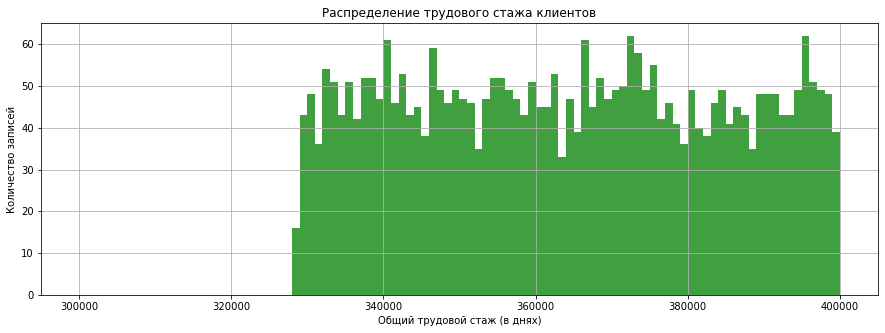

In [32]:
(data['days_employed'].hist(bins=100, figsize=(15, 5), color='green', alpha=0.75, range=(300000, 400000))
                      .set(xlabel='Общий трудовой стаж (в днях)',
                           ylabel='Количество записей',
                           title='Распределение трудового стажа клиентов'));
400000/365

Максимальное значение в данной моде превышает 400000 дней что соответствует более чем 1000 лет стажа, что очевидно является ошибкой вывода. Возможно ошибка возникла вследствие неправильного ввода данных или несовпадения типов, размерностей и т.д. В данном случае неооходимо дополнительно проработать форматы вывода этого столбца совместно с инженером предоставившим данные.
В связи с тем, что столбец со стажем работы не нужен для ответа на поставленные Заказчиком вопросы, принимая во внимание что столбец содержит большое количество ошибок, его предлагается удалить из данных.

In [33]:
#  удаляем столбец days_employed
data.drop('days_employed', axis=1, inplace=True)

In [34]:
#убедимся что столбца days_employed больше нет в данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21524 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   children          21524 non-null  int64   
 1   dob_years         21524 non-null  int64   
 2   education         21524 non-null  object  
 3   education_id      21524 non-null  int64   
 4   family_status     21524 non-null  object  
 5   family_status_id  21524 non-null  int64   
 6   gender            21524 non-null  object  
 7   income_type       21524 non-null  object  
 8   debt              21524 non-null  int64   
 9   total_income      21524 non-null  float64 
 10  purpose           21524 non-null  object  
 11  job_info          21524 non-null  bool    
 12  age_group         21524 non-null  category
dtypes: bool(1), category(1), float64(1), int64(5), object(5)
memory usage: 2.6+ MB


Теперь в таблице нет пропущенных данных все ячейки заполнены. Однако прежде чем идти дальше рассмотрим еще один важный столбец который ранее мы еще не затрагиваливали, но который является важным для ответа на поставленный заказчиком вопрос - это столбец, содержащий информацию о количестве детей.

#### Обзор данных в столбце children
Как обычно начнем с построения гистограммы по данному столбцу и просмотра параметров распределения.

count    21524.000000
mean         0.538933
std          1.381615
min         -1.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         20.000000
Name: children, dtype: float64

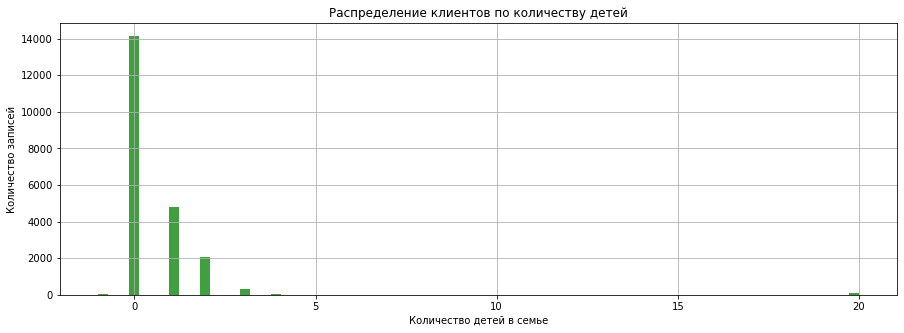

In [35]:
(data['children'].hist(bins=75, figsize=(15, 5), color='green', alpha=0.75)
                 .set(xlabel='Количество детей в семье',
                      ylabel='Количество записей',
                      title='Распределение клиентов по количеству детей'));
data['children'].describe()

Столбец содержит данные по числу детей от 20 до минус одного. Если число детей равное 20, в свете необходимости повышения демографической ситуации, еще можно принять, то число минус один является явной ошибкой. Посчитаем число строк где число детей  меньше нуля

In [36]:
# определим процент людей для которых указано число детей меньше нуля
print('Количество строк в которых указано число детей менее нуля: {:.1%}'.format(data[data['children']<0].shape[0] / 
                                                                                 data.shape[0]))

Количество строк в которых указано число детей менее нуля: 0.2%


Причины появления отрицательных значений в колонке children не очевидны. Возможно в форме для ввода данных поле с информацией о детях реализованно в виде счетчика который позволяет увеличивать или уменьшать введенные числа на определенный дискрет (на единицу) при этом по умолчанию в поле стоит нуль, а возможность щелкнуть счетчик в отрицательную сторону из положения по умолчанию не ограничена. Чтобы избавиться от отрицательных чисел в колонке вычислим модуль

In [37]:
data['children'] = data['children'].abs()
# убедимся что теперь отрицательных чисел нет
data['children'].describe()

count    21524.000000
mean         0.543301
std          1.379903
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         20.000000
Name: children, dtype: float64

### Вывод

* Доходы заемщиков в общем случае зависят как от пола так и от возраста и образования. Эти зависимости были выявлены и учтены при заполнении пропусков в столбце с доходами
* Данные в столбце со стажем содержат ошибки вывода. В связи с тем что информация о стаже не нужна для ответа на поставленные Заказчиком вопросы было принято решение удалить данный столбец из данных
* Устранены ошибки некорректного ввода данных в столбце children

### Замена типа данных
Проведем замену типов данных, при этом используем следующие типы:
* для столбцов children и dob_years - uint8 так как значения в данных столбцах целые и никогда не будут превышать 255
* для столбцов education, education_id, family_status, family_status_id, gender, income_type, age_group - category так как значения в данных столбцах могут принимать только определенный набор значений
* для столбцов debt и job_info - bool так как данные в этих столбцах могут принимать значение только 1 или 0 
* для столбца total_income - float32 так как установленный по умолчанию тип float64 с двойной точностью является избыточным. Одинарной точности достаточно для представления ежемесячного дохода

Для замены типов данных создатим словарь data_type_dict в который запишем названия столбцов и их требуемый тип и приеним этот словарь к данным с помощью метода astype

In [38]:
data_type_dict = {'children':'uint8', 
                  'dob_years':'uint8', 
                  'education': 'category',
                  'education_id': 'category',
                  'family_status': 'category',
                  'family_status_id': 'category',
                  'gender': 'category',
                  'income_type': 'category',
                  'debt': 'bool',
                  'total_income': 'float32',
                  'purpose': 'object',
                  'job_info': 'bool',
                  'age_group': 'category'
                  }
data = data.astype(data_type_dict)

In [39]:
# убедимся что заданные нами типы применились так как задуманно
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21524 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   children          21524 non-null  uint8   
 1   dob_years         21524 non-null  uint8   
 2   education         21524 non-null  category
 3   education_id      21524 non-null  category
 4   family_status     21524 non-null  category
 5   family_status_id  21524 non-null  category
 6   gender            21524 non-null  category
 7   income_type       21524 non-null  category
 8   debt              21524 non-null  bool    
 9   total_income      21524 non-null  float32 
 10  purpose           21524 non-null  object  
 11  job_info          21524 non-null  bool    
 12  age_group         21524 non-null  category
dtypes: bool(2), category(7), float32(1), object(1), uint8(2)
memory usage: 1.3+ MB


### Вывод

Преобразование типов позмолило уменьшить объем памяти которе занимают данные. Если до преобразования данные занимали порядка 2,6 МБ, то после преобразования типов порядка 1,3 МБ

<div class="alert alert-success">
<h2> Комментарий от ревьюера </h2>

Просто космос 🚀

</div>

### Обработка дубликатов

In [40]:
# оценим количество дубликатов в данных суммированием логических единиц выдаваемых методом duplicated
data.duplicated().sum()

71

In [41]:
# удалим повторяющиеся данные методом drop_duplicates и сбросим нумерацию строк
data = data.drop_duplicates().reset_index(drop=True)

# проверим что в данных не осталось дубликатов
data.duplicated().sum()

0

### Вывод

Количество дубликатов в исходных данных не велико (71). Возможно это вызвано просто тем что работник банка по неосторожности дваждый сохранил данные клиента (например случайно щелкнуй дважды кнопкой мыши вместо одного раза), а используемое банковское ПО такую ситуацию не отфильтровывает. После применения метода drop_duplicates данные больше не содержат дубликатов.

### Лемматизация

In [42]:
# # установка библиотекки для лемматизации текста pymystem3
# !pip install pymystem3

In [43]:
# лемметизируем данные с помощью библиотеки pymystem3 и сохраним их в столбце purpose_lemmatized
from pymystem3 import Mystem
m = Mystem()
data['purpose_lemmatized'] = data['purpose'].apply(m.lemmatize)

In [44]:
# посмотрим для каких целей берут кредиты чаще всего
data['purpose_lemmatized'].str.join(' ').value_counts()

автомобиль \n                                    972
свадьба \n                                       791
на   проведение   свадьба \n                     768
сыграть   свадьба \n                             765
операция   с   недвижимость \n                   675
покупка   коммерческий   недвижимость \n         661
операция   с   жилье \n                          652
покупка   жилье   для   сдача \n                 651
операция   с   коммерческий   недвижимость \n    650
жилье \n                                         646
покупка   жилье \n                               646
покупка   жилье   для   семья \n                 638
строительство   собственный   недвижимость \n    635
недвижимость \n                                  633
операция   со   свой   недвижимость \n           627
строительство   жилой   недвижимость \n          624
покупка   недвижимость \n                        620
покупка   свой   жилье \n                        620
строительство   недвижимость \n               

In [45]:
# создадим функциию purpose_grouper() которая принимает на вход строку данных, 
# анализирует столбец purpose_lemmatized на наличие ключевых слов из внутреннего списка classificator и
# возвращает строковое значение равное первому совпавшему слову из списка classificator
def purpose_grouper(row):
    try:
        purpose = row['purpose_lemmatized']
        classificator = ['свадьба', 'автомобиль', 'недвижимость', 'жилье', 'образование']
        for elem in classificator:
            if elem in purpose:
                result = elem
                break # цикл прерывается как только найдено первое совпадение
            else:
                result = 'unknown'
        return result
    except:
        print('Ошибка в функции purpose_grouper. Проверьте входные данные')

# применим написанную функцию к данным и сохраним результат в столбце purpose_classificated
data['purpose_classificated'] = data.apply(purpose_grouper, axis=1)

In [46]:
# проверим что у нас не осталось неклассифицированных значений
data['purpose_classificated'].value_counts()

недвижимость    6350
жилье           4460
автомобиль      4306
образование     4013
свадьба         2324
Name: purpose_classificated, dtype: int64

In [47]:
# проверим что количество классифицированных значений равно числу строк в таблице
data['purpose_classificated'].value_counts().sum() == data.shape[0]

True

In [48]:
# поскульку категории "жилье" и "недвижимость" предполагают одно и то же, то заменим "жилье" на "недвижимость" по маске
data['purpose_classificated'].mask(data['purpose_classificated'] == 'жилье', other='недвижимость', inplace=True)

# проверим что замена прошла успешно
data['purpose_classificated'].value_counts()

недвижимость    10810
автомобиль       4306
образование      4013
свадьба          2324
Name: purpose_classificated, dtype: int64

### Вывод

Чаще всего заемщики берут кредиты на покупку недвижимости. Почти в 2,5 раза меньше заемщиков берут кредиты на покупку автомобиля или получение образования. Наименее популярная категория из представленных кредиты на свадьбу.

### Категоризация данных
Посмотрим информацию о нашем датасете еще раз

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21453 entries, 0 to 21452
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   children               21453 non-null  uint8   
 1   dob_years              21453 non-null  uint8   
 2   education              21453 non-null  category
 3   education_id           21453 non-null  category
 4   family_status          21453 non-null  category
 5   family_status_id       21453 non-null  category
 6   gender                 21453 non-null  category
 7   income_type            21453 non-null  category
 8   debt                   21453 non-null  bool    
 9   total_income           21453 non-null  float32 
 10  purpose                21453 non-null  object  
 11  job_info               21453 non-null  bool    
 12  age_group              21453 non-null  category
 13  purpose_lemmatized     21453 non-null  object  
 14  purpose_classificated  21453 non-null 

Мы уже перевели в категориальные переменные столбцы education_id, family_status, family_status_id, gender, income_type, age_group. Однако у нас появился новый столбец purpose_classificated который по сути так же является категориальным. Давайте изменим и его тип

In [50]:
data['purpose_classificated'] = data['purpose_classificated'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21453 entries, 0 to 21452
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   children               21453 non-null  uint8   
 1   dob_years              21453 non-null  uint8   
 2   education              21453 non-null  category
 3   education_id           21453 non-null  category
 4   family_status          21453 non-null  category
 5   family_status_id       21453 non-null  category
 6   gender                 21453 non-null  category
 7   income_type            21453 non-null  category
 8   debt                   21453 non-null  bool    
 9   total_income           21453 non-null  float32 
 10  purpose                21453 non-null  object  
 11  job_info               21453 non-null  bool    
 12  age_group              21453 non-null  category
 13  purpose_lemmatized     21453 non-null  object  
 14  purpose_classificated  21453 non-null 

Кроме того, как было отмечено при первичном анализе, данные в столбцах education и education_id (как и в столбцах family_status и family_status_id) являются дублирующими друг друга и никакой дополнительной информации не несут. По этому соответствие education столбцу education_id (family_status и family_status_id) лучше вынести в отдельные словари, а столбцы education и family_status из данных удалить

In [51]:
# скопируем столбцы education и education_id в переменную education_dict и удалим дубликаты для получения словаря
education_dict = data[['education', 'education_id']]
education_dict = education_dict.drop_duplicates().reset_index(drop=True)
education_dict

,education,education_id
0,высшее,0
1,среднее,1
2,неоконченное высшее,2
3,начальное,3
4,ученая степень,4


In [52]:
# аналогично поступим и со столбцами family_status и family_status_id
family_status_dict = data[['family_status', 'family_status_id']]
family_status_dict = family_status_dict.drop_duplicates().reset_index(drop=True)
family_status_dict

,family_status,family_status_id
0,женат / замужем,0
1,гражданский брак,1
2,вдовец / вдова,2
3,в разводе,3
4,Не женат / не замужем,4


In [53]:
# теперь когда у нас есть словари education_dict и family_status_dict столбцы education и family_status можно удалить из данных
data.drop(['education', 'family_status'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21453 entries, 0 to 21452
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   children               21453 non-null  uint8   
 1   dob_years              21453 non-null  uint8   
 2   education_id           21453 non-null  category
 3   family_status_id       21453 non-null  category
 4   gender                 21453 non-null  category
 5   income_type            21453 non-null  category
 6   debt                   21453 non-null  bool    
 7   total_income           21453 non-null  float32 
 8   purpose                21453 non-null  object  
 9   job_info               21453 non-null  bool    
 10  age_group              21453 non-null  category
 11  purpose_lemmatized     21453 non-null  object  
 12  purpose_classificated  21453 non-null  category
dtypes: bool(2), category(6), float32(1), object(2), uint8(2)
memory usage: 629.9+ KB


### Вывод

Категоризация данных и использование отдельных таблиц-словорей так же позволяет снизить требуемый объем памяти

### Шаг 3. Ответьте на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [54]:
# сгруппируем данные по количеству детей и оценим вероятность просрочки кредитов для каждой группы
data.groupby('children')['debt'].agg(['count','mean']).style.format({'mean': '{:.2%}'})

,count,mean
children,,
0,14090,7.54%
1,4855,9.17%
2,2052,9.45%
3,330,8.18%
4,41,9.76%
5,9,0.00%
20,76,10.53%


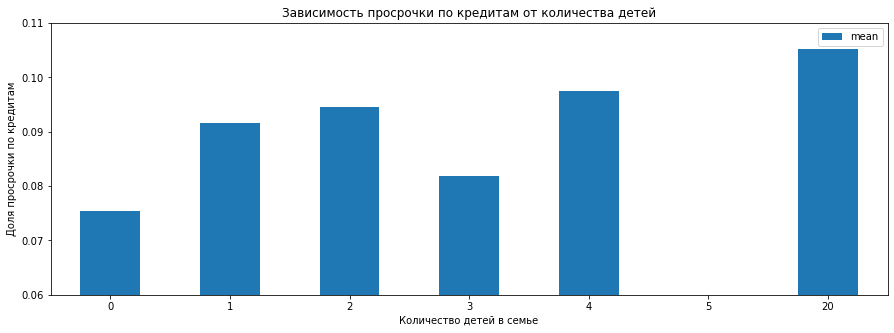

In [55]:
# построим график зависимости вероятности просрочки от количества детей
(data.groupby('children')['debt'].agg(['mean']).plot(kind='bar', figsize=(15, 5), ylim=(0.06, 0.11), rot=0)
                                 .set(xlabel='Количество детей в семье',
                                      ylabel='Доля просрочки по кредитам',
                                      title='Зависимость просрочки по кредитам от количества детей'));

### Вывод

Выборка по людям с количеством детей три и выше является очень маленькой и не репрезентативной. Рассмотрим лишь группы заемщиков которые имеют от нуля до двух детей как наиболее часто встречающиеся. Согласно полученным данным заемщики не имеющие детей реже всего допускают просрочку по кредитам (7,5%). Наличие хотя бы одного ребенка увеличивает вероятность просрочки у заемщика до 9,2% (увеличение на 1,7%), а наличие двух детей до 9,5%. Таким образом можно считать подтвержденной гипотезу о том, что имеется зависимость между наличием детей и возвратом кредита в срок

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [56]:
# сгруппируем данные по идентификатору семейного статуса и оценим вероятность просрочки кредитов для каждой группы
# дополнительно для удобства присоеденим к таблице расшифровку индентификаторов семейного статуса из словаря family_status_dict
(data.groupby('family_status_id')['debt'].agg(['count','mean']).merge(family_status_dict, on='family_status_id')
                                         .style.format({'mean': '{:.2%}'}))

,family_status_id,count,mean,family_status
0,0,12339,7.55%,женат / замужем
1,1,4150,9.35%,гражданский брак
2,2,959,6.57%,вдовец / вдова
3,3,1195,7.11%,в разводе
4,4,2810,9.75%,Не женат / не замужем


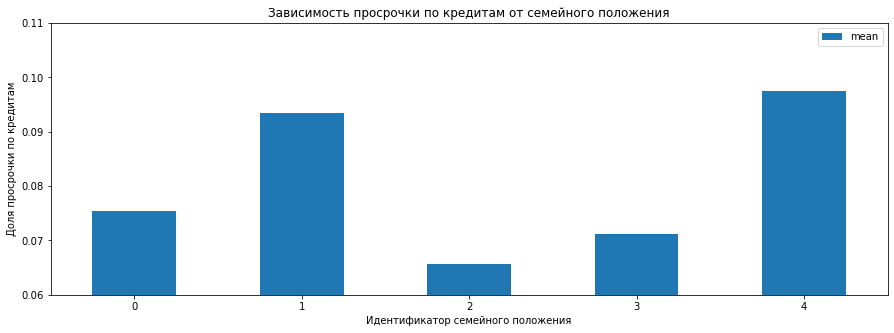

In [57]:
# построим график зависимости вероятности просрочки от идентификатора семейного положения
(data.groupby('family_status_id')['debt'].agg(['mean']).plot(kind='bar', figsize=(15, 5), ylim=(0.06, 0.11), rot=0)
                                         .set(xlabel='Идентификатор семейного положения',
                                              ylabel='Доля просрочки по кредитам',
                                              title='Зависимость просрочки по кредитам от семейного положения'));

### Вывод

Гипотеза о том, что между семейным положением и возвратом кредита в срок имеется зависимость подтвердилась. Чаще всего просрочку допускают не женатые / не замужние люди (порядка 9,8%), а так же люди живущие в гражданском браке (9,3%), а вот вероятность просрочки у женатых / замужних составляет всего 7,5%

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [58]:
# Разабъем заемщиков по категориям с помощью метода cut. Границы категорий определяются переменной bins
bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 450000, 500000, 550000, 600000, 650000, 700000, 750000, 999999999]
data['income_category'] = pd.cut(data['total_income'], bins)
data.groupby('income_category')['debt'].agg(['count','mean']).style.format({'mean': '{:.2%}'})

,count,mean
income_category,,
"(0, 50000]",372,6.18%
"(50000, 100000]",4092,8.09%
"(100000, 150000]",6903,8.47%
"(150000, 200000]",4895,8.99%
"(200000, 250000]",2379,7.06%
"(250000, 300000]",1330,6.62%
"(300000, 450000]",1150,7.65%
"(450000, 500000]",110,3.64%
"(500000, 550000]",68,7.35%


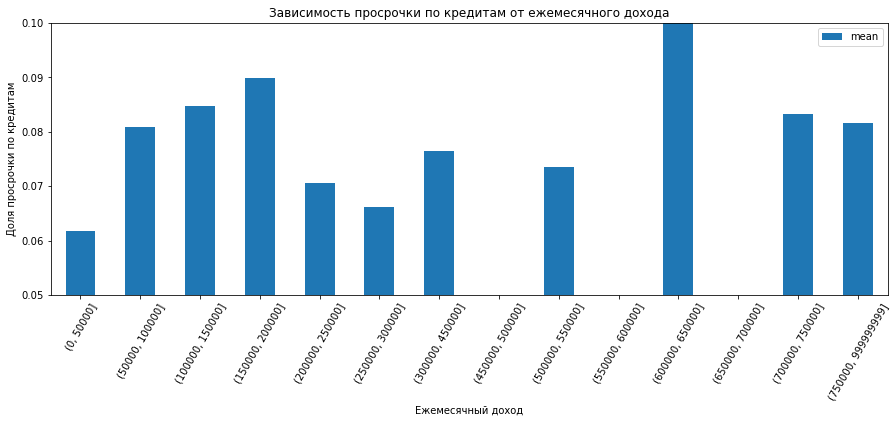

In [59]:
(data.groupby('income_category')['debt'].agg(['mean']).plot(kind='bar', figsize=(15, 5), ylim=(0.05, 0.1), rot=60)
     .set(xlabel='Ежемесячный доход',
          ylabel='Доля просрочки по кредитам',
          title='Зависимость просрочки по кредитам от ежемесячного дохода'));

### Вывод

Выборка по заемщикам с уровнями дохода более 450 000 в месяц является нерепрезентативной в виду малого колчества людей в указанных категориях. С увеличением дохода выше 150 000 в месяц люди реже обращаются за кредитами. Ответ на вопрос о наличии зависимости между уровнем дохода и возвратом кредита в срок неоднозначен. Вероятность просрочки с одной стороны увеличивается с увеличением зарплаты от диапазона 0-50000 к диапазону 150000-200000, с другой стороны при дальнейшем увеличении доходов снижается. Возможно влияет то, что в диапазоне доходов от 100000 до 200000 сосредоточена основная часть заемщиков, а как следствие основная часть просрочки ложиться на эту социальную группу. Таки образом однозначной зависимости между уровнем дохода и возвратом кредита в срок установить не удалось.

- Как разные цели кредита влияют на его возврат в срок?

In [60]:
data.groupby('purpose_classificated')['debt'].agg(['count','mean']).style.format({'mean': '{:.2%}'})

,count,mean
purpose_classificated,,
автомобиль,4306,9.36%
недвижимость,10810,7.23%
образование,4013,9.22%
свадьба,2324,8.00%


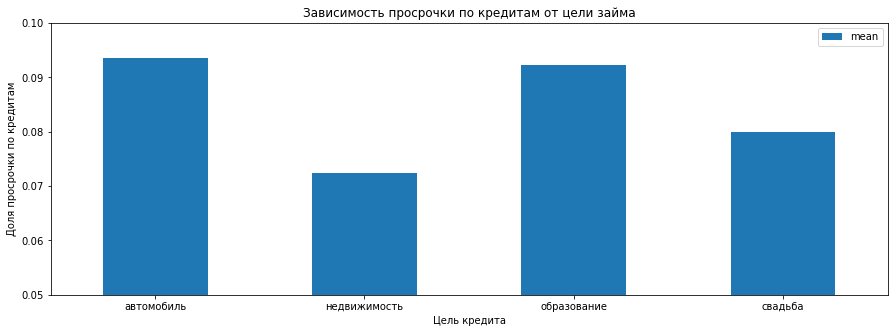

In [61]:
(data.groupby('purpose_classificated')['debt'].agg(['mean']).plot(kind='bar', figsize=(15, 5), ylim=(0.05, 0.1), rot=0)
     .set(xlabel='Цель кредита',
          ylabel='Доля просрочки по кредитам',
          title='Зависимость просрочки по кредитам от цели займа'));

### Вывод

Ипотека (кредит на недвижимость) является наименее рискованным для банка из всех рассматриваемых типов кредитов. Доля просрочки по таким кредитам составляет порядка 7,2%. Чуть хуже возращаются кредиты на свадьбу - просрочка составляет 8,0%. Еще хуже обстоят дела с кредитами на образование и автомобили (9,2% и 9,4% соответственно)

####  Дополнительные оценки
Дополнительно оценим как на просрочку влияет уровень образования, а так же то указывал клиент свои доходы при получении кредита или нет
- Есть ли зависимость между уровнем образования и возвратом кредита в срок?

In [62]:
# сгруппируем данные по идентификатору уровня образования и оценим вероятность просрочки кредитов для каждой группы
# дополнительно для удобства присоеденим к таблице расшифровку индентификаторов из словаря education_dict
(data.groupby('education_id')['debt'].agg(['count','mean']).merge(education_dict, on='education_id')
     .style.format({'mean': '{:.2%}'}))

,education_id,count,mean,education
0,0,5250,5.30%,высшее
1,1,15172,8.99%,среднее
2,2,743,9.15%,неоконченное высшее
3,3,282,10.99%,начальное
4,4,6,0.00%,ученая степень


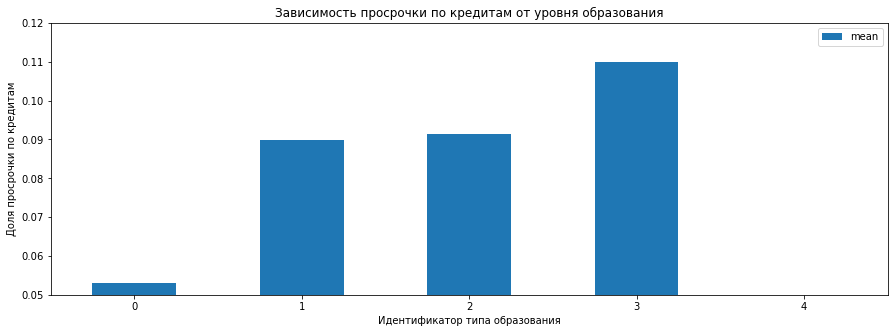

In [63]:
(data.groupby('education_id')['debt'].agg(['mean']).plot(kind='bar', figsize=(15, 5), ylim=(0.05, 0.12), rot=0)
     .set(xlabel='Идентификатор типа образования',
          ylabel='Доля просрочки по кредитам',
          title='Зависимость просрочки по кредитам от уровня образования'));

### Вывод

Уровень образования оказывает значительное влияние на возвратность кредитов. Если люди со средним образованием допускают просрочку в 9,0% случаев, то люди с высшим образованием только в 5,3% случаев. Таким образом зависимость между уровнем образования и возвратом кредита в срок имеется. Так же следует отметить что чаще всего за кредитами обращаются люди со средним образованием (в трое чаще чем люди с высшим образованием)

- Есть ли зависимость между тем указывал ли заемщик данные о своих доходах или нет и возвратом кредита в срок?

In [64]:
data.groupby('job_info')['debt'].agg(['count','mean']).style.format({'mean': '{:.2%}'})

,count,mean
job_info,,
False,2103,8.08%
True,19350,8.12%


### Вывод

Зависимости между тем указывал ли заемщик данные о своих доходах или нет и возвратом кредита в срок не наблюдается, что говорит о высоком качестве скоринговой системы банка которая может оценить возвратность кредита даже в отсутствии априорной информации о доходах.

### Шаг 4. Общий вывод

**В процессе данного исследования были проведены следующие работы:**
1. Проведен обзор предоставленных данных, изучена общая информация выявленны ключевые проблемы которые необходимо решить на этапе предобработки данных (наличие пропусков и дубликатов, в данных имелись люди с нулевым возрастом, отрицательным количеством детей и трудовым стажем более 1000 лет)
2. Проведена предобработка данных. Для заполнения пропусков были выявлены зависимости доходов заемщиков от пола, возраста, уровня образования и источника доходов. Замененены некорректные данные в столбцах с возрастом и количеством детей. Столбец  с трудовым стажем удален, так как информация из него не нужна для ответа на поставленные заказчиком вопросы
3. Выделены леммы в столбце с целями получения кредита, проведена классификация каждой строки в данных по принадлежности к определенному типу кредита
4. Исследованы поставленные Заказчиком вопросы и дополнительные предположения

**По результатам исследования установлено:**
*  Зависимость между наличием детей и возвратом кредита в срок имеется. Заемщики не имеющие детей реже всего допускают просрочку по кредитам (7,5%). Наличие хотя бы одного ребенка увеличивает вероятность просрочки у заемщика до 9,2%, а наличие двух детей до 9,5%
* Зависимось между семейным положением и возвратом кредита в срок имеется.Чаще всего просрочку допускают не женатые / не замужние люди (порядка 9,8%), а так же люди живущие в гражданском браке (9,3%), а вот вероятность просрочки у женатых / замужних составляет всего 7,5%
* Однозначной зависимости между уровнем дохода и возвратом кредита в срок установить не удалось. Вероятность просрочки с одной стороны увеличивается с увеличением зарплаты от диапазона 0-50000 к диапазону 150000-200000, с другой стороны при дальнейшем увеличении доходов снижается. Возможно влияет то, что в диапазоне доходов от 100000 до 200000 сосредоточена основная часть заемщиков, а как следствие основная часть просрочки ложиться на эту социальную группу.
* С увеличением дохода выше 150 000 в месяц люди реже обращаются за кредитами.
* Ипотека является наименее рискованным типом кредита для банка из всех рассмотреных. Доля просрочки по таким кредитам составляет порядка 7,2%. Чуть хуже возращаются кредиты на свадьбу - просрочка составляет 8,0%. Еще хуже обстоят дела с кредитами на образование и автомобили (9,2% и 9,4% соответственно)
* Имеется зависимость между уровнем образования и возвратом кредита в срок. Если люди со средним образованием допускают просрочку в 9,0% случаев, то люди с высшим образованием только в 5,3% случаев.
* Люди со средним образованием берут кредит практически в три раза чаще, чем люди с высшим образованиием, а люди имеющие ученую степень крайне редко обращаются за кредитами.
* Образование так же оказывает существенное влияние на уровень доходов. Так люди с высшим образованием зарабатывают примерно на 30% больше чем люди со средним образованием, а люди с начальным образованием на 14 % меньше чем люди со средним образованием. 
* Медианный доход заемщиков достигает максимума в возрасте от 31 до 42 лет и далее с возрастом постепенно уменьшается. После 55 лет происходит значительное уменьшение доходов (более 15%), что связано с постепенным выходом людей на пенсию.
* Женщины чаще становятся заемщиками чем мужчины, но их медианный доход ниже чем у мужчин.
* Зависимости между тем указывал ли заемщик данные о своих доходах или нет и возвратом кредита в срок не наблюдается, что говорит о высоком качестве скоринговой системы банка.

**Рекомендации:**
1. Полученные зависимости между наличием детей, семейным положением, уровнем образования заемщика рекомендуется использовать при дальнейшем улучшении скоринговой системы.
2. Рекомендуется рассмотреть возможность наращивания доли на рынке ипотечных кредитов так как ипотека является наименее рискованным типом займа для банка из рассмотренных. Так же хорошую возвратность имеют кредиты на свадьбу, но тут низкая вероятность просрочки скорее связана с тем что женатые / замужние люди впринципе чаще возвращают кредиты.
3. В связи с тем риски невозврата кредита у людей с высшим образованием значительно ниже, учитывая что количество заемщиков с высшим образованием втрое ниже чем у заемщиков со средним образованием, рекомендуется рассмотреть возможность увеличения доли заемщиков с высшим образованием.
4. Рекомендуется доработать форму для ввода данных о клиенте работниками банка следующим образом:
    - дать работнику банка возможность выбирать из заранее заданного списка тип образования клиента, а не вводить его вручную
    - исключить возможность введения отрицательного числа детей при заполнении соответствующей формы
    - ввести всплывающие подсказки о необходимости заполнения граф возраст и пол клиента, так как эти данные в датасете для ряда клиентов были некорректно указаны.
5. Рекомендуется провести отдельную работу с инженером предоставившим данные по графе стаж работы так как эта графа содержит большое число ошибок.


### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл;
- [x]  файл изучен;
- [x]  определены пропущенные значения;
- [x]  заполнены пропущенные значения;
- [x]  есть пояснение, какие пропущенные значения обнаружены;
- [x]  описаны возможные причины появления пропусков в данных;
- [x]  объяснено, по какому принципу заполнены пропуски;
- [x]  заменен вещественный тип данных на целочисленный;
- [x]  есть пояснение, какой метод используется для изменения типа данных и почему;
- [x]  удалены дубликаты;
- [x]  есть пояснение, какой метод используется для поиска и удаления дубликатов;
- [x]  описаны возможные причины появления дубликатов в данных;
- [x]  выделены леммы в значениях столбца с целями получения кредита;
- [x]  описан процесс лемматизации;
- [x]  данные категоризированы;
- [x]  есть объяснение принципа категоризации данных;
- [x]  есть ответ на вопрос: "Есть ли зависимость между наличием детей и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Есть ли зависимость между семейным положением и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Есть ли зависимость между уровнем дохода и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Как разные цели кредита влияют на его возврат в срок?";
- [x]  в каждом этапе есть выводы;
- [x]  есть общий вывод.